This case study was developed by Marlene Smith from the University of Colorado Denver Business School. The case study was completed using JMP software package. The case study provides good inspiration for case studies solving similar , perhaps more modern, business domain problems. The case study can be obtained from the [JMP website](https://www.jmp.com/en_us/academic/case-study-library.html#cost). This notebook is a conversion of the case study to Python. 

## Table of Contents

## Background
An antique dealer recently opened a shop. The store is open to the public on Tuesdays through Sundays from 10am to 6pm. Direct mail (unsolicited flyers and informational brochures) is the primary advertising outlet. Direct mailings are sent out every Wednesday. 

## Problem Statement 
Are sales related to direct mail campaign? 

## Data

The data is a weekly time-series using all available data since the opening of the dealership. The variables in the data set are:

- Week: The week number
- Sales: Weekly (Tuesday through Sunday) total revenues in $1,000
- Direct Mail: Weekly direct mail costs, including supplies and postage, in dollars

## Data Management

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
data = pd.read_csv("directmail.csv", index_col='Week')

In [4]:
data.head()

,Sales,Direct Mail
Week,,
1,12.123,98
2,21.209,212
3,9.998,561
4,42.978,413
5,49.637,267


In [7]:
data[data['Sales'] > 15]

,Sales,Direct Mail
Week,,
2,21.209,212
4,42.978,413
5,49.637,267
6,31.645,321
7,28.698,529
8,49.611,731
9,38.908,695
10,78.735,544
11,44.631,87


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1 to 19
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        19 non-null     float64
 1   Direct Mail  19 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 456.0 bytes


In [9]:
data.describe()

,Sales,Direct Mail
count,19.000000,19.000000
mean,42.727000,420.473684
std,18.487936,207.666498
min,9.998000,87.000000
25%,31.703500,273.000000
50%,42.004000,413.000000
75%,49.755000,552.500000
max,78.735000,820.000000


The 1000's seperator was interpreted as a decimal point. We need to multiple the column by a 1000.

In [10]:
data['Sales'] = data['Sales']*1000

In [11]:
data.describe()

,Sales,Direct Mail
count,19.000000,19.000000
mean,42727.000000,420.473684
std,18487.936355,207.666498
min,9998.000000,87.000000
25%,31703.500000,273.000000
50%,42004.000000,413.000000
75%,49755.000000,552.500000
max,78735.000000,820.000000


<AxesSubplot:ylabel='Frequency'>

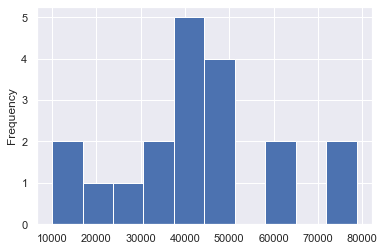

In [12]:
data['Sales'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

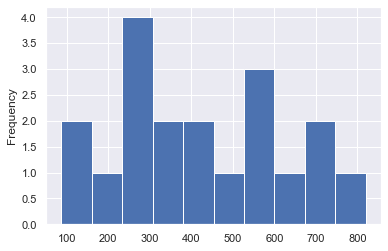

In [13]:
data['Direct Mail'].plot(kind='hist')

<AxesSubplot:>

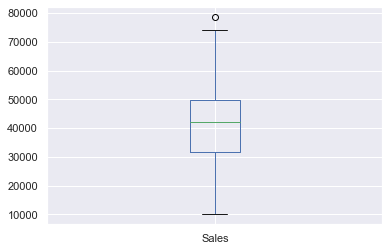

In [14]:
data['Sales'].plot(kind='box')

<AxesSubplot:>

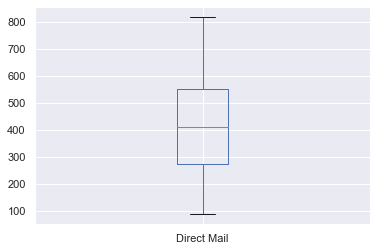

In [15]:
data['Direct Mail'].plot(kind='box')

In the summary shown above, we can see over the first 19 weeks was around 42,730 with a typical fluctation of 18,500. Direct mail costs averaged roughly 420 per week, although there there was a lot of variability in direct mail expenditures from week to week, with a typical fluctuation of 208

### Sales over time

Text(0.5, 1.0, 'Sales over time')

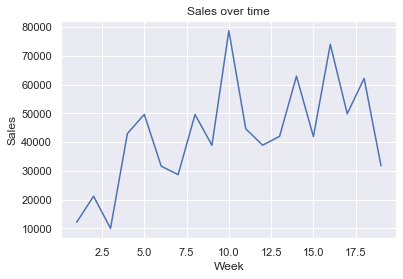

In [16]:
sns.lineplot(data=data, x=data.index, y=data.Sales)
plt.title('Sales over time')

Sales grew initially , but may be leveling off. 

To examine the relationship between direct mail expenditures and sales, we construct a regression model. 

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
lm = LinearRegression()

In [25]:
X = data[['Direct Mail']].copy()
y = data['Sales']

In [26]:
X.shape

(19, 1)

In [27]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lm.coef_

array([22.41872331])

In [31]:
lm.intercept_

33300.516814974

In [34]:
lm.score(X,y)

0.06341292065828774

In [35]:
import statsmodels.api as sm

In [36]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.151
Date:                Mon, 15 Feb 2021   Prob (F-statistic):              0.298
Time:                        09:32:27   Log-Likelihood:                -212.50
No. Observations:                  19   AIC:                             429.0
Df Residuals:                      17   BIC:                             430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.33e+04   9748.879      3.416      

/Users/ruannevanderwalt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [45]:
data['DM_lagged'] = data['Direct Mail'].shift(periods=1, fill_value=0)

In [46]:
data.head()

,Sales,Direct Mail,DM_lagged
Week,,,
1,12123.0,98,0
2,21209.0,212,98
3,9998.0,561,212
4,42978.0,413,561
5,49637.0,267,413


In [47]:
X2 = data[['DM_lagged']].copy()
y = data['Sales']

In [49]:
X2 = X2[1:]
y = y[1:]

In [50]:
X3 = sm.add_constant(X2)
est = sm.OLS(y, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     11.50
Date:                Mon, 15 Feb 2021   Prob (F-statistic):            0.00373
Time:                        09:41:33   Log-Likelihood:                -195.94
No. Observations:                  18   AIC:                             395.9
Df Residuals:                      16   BIC:                             397.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.209e+04   7336.104      3.011      0.0

/Users/ruannevanderwalt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
